Total number of units: 135

Data columns: ['Site Name', 'Power (MW)', 'Duration (hours)']

Power statistics:
count    135.000000
mean      82.711911
std       99.333151
min        4.800000
25%       27.000000
50%       47.500000
75%       85.000000
max      400.000000
Name: Power (MW), dtype: float64

Duration statistics:
count    135.000000
mean       1.951111
std        0.478940
min        1.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: Duration (hours), dtype: float64


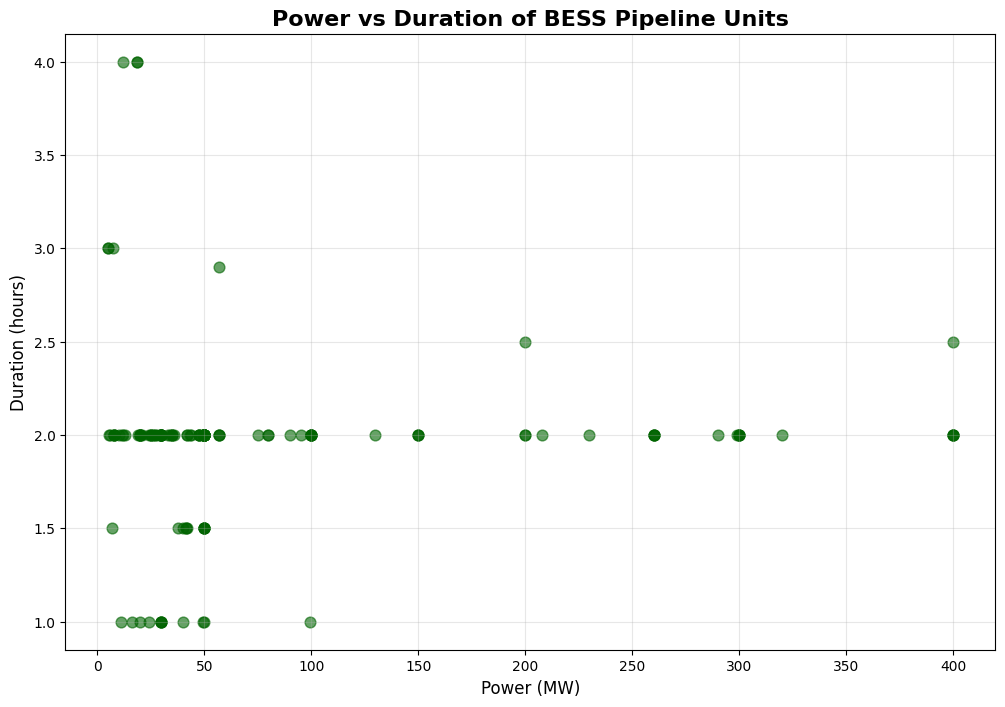

In [ ]:
'''Figure 69'''
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df_raw = pd.read_csv('BESS pipeline by Modo.csv')
df = df_raw.copy()  # Use all data since there's no year column to filter

# Display basic info about the data
print(f"Total number of units: {len(df)}")
print(f"\nData columns: {df.columns.tolist()}")

print(f"\nPower statistics:")
print(df['Power (MW)'].describe())
print(f"\nDuration statistics:")
print(df['Duration (hours)'].describe())

# Scatter plot to show relationship between power and duration
plt.figure(figsize=(12, 8))
plt.scatter(df['Power (MW)'], df['Duration (hours)'], alpha=0.6, s=60, color='darkgreen')
plt.title('Power vs Duration of BESS Pipeline Units', fontsize=16, fontweight='bold')
plt.xlabel('Power (MW)', fontsize=12)
plt.ylabel('Duration (hours)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

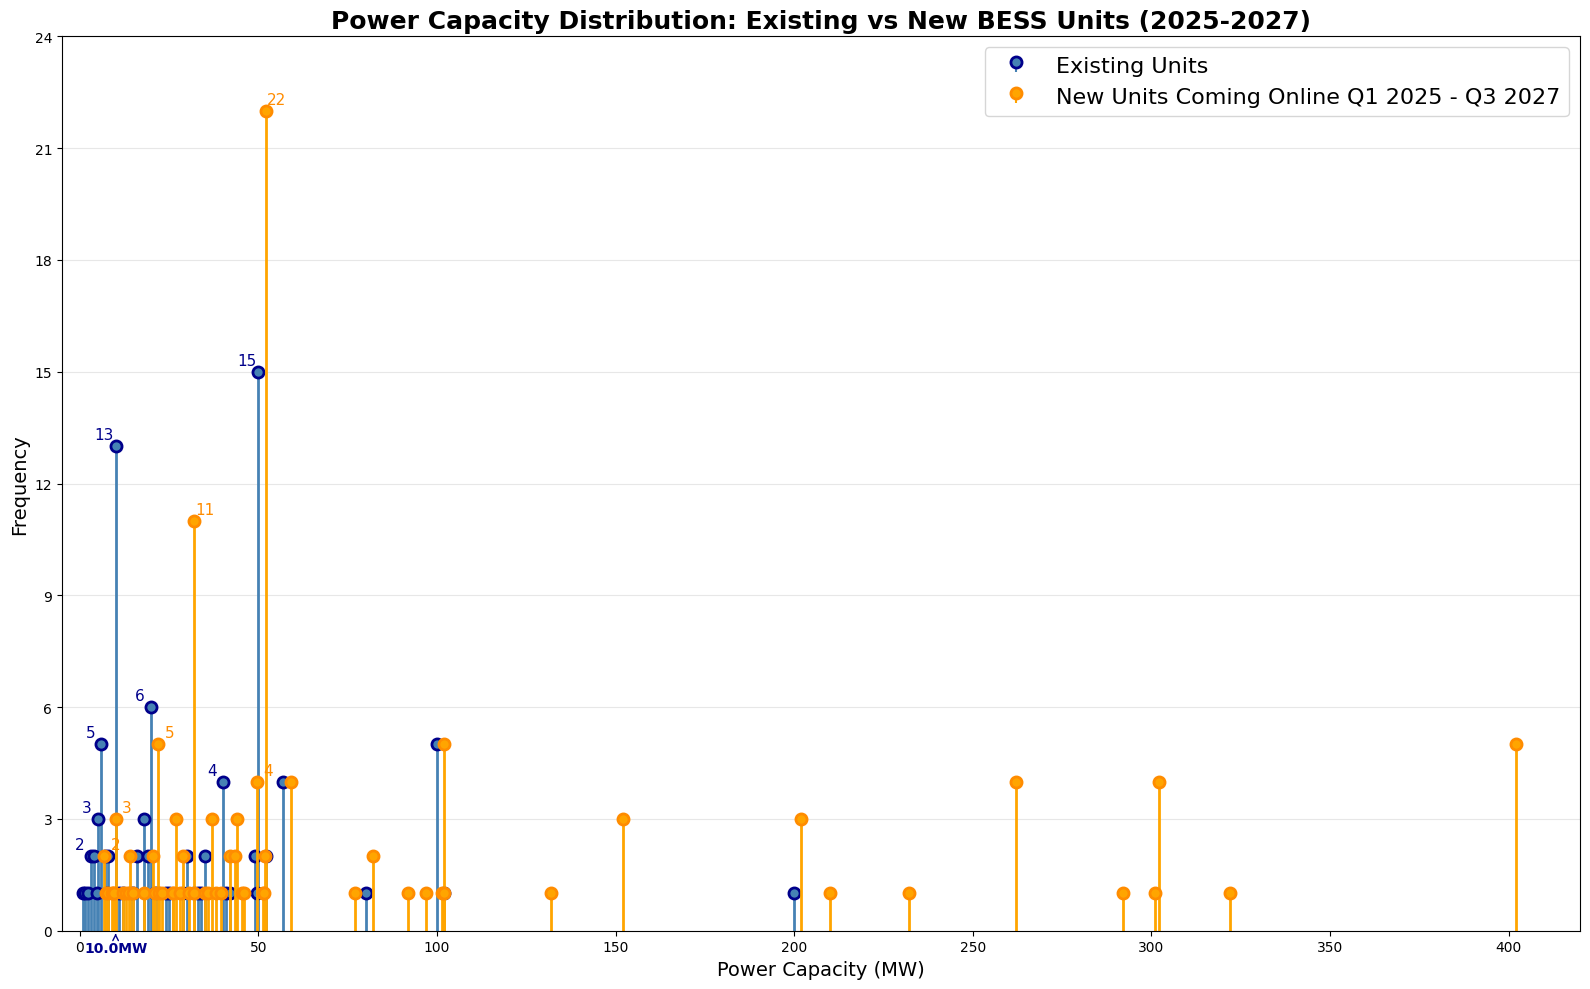


=== COMPARISON SUMMARY ===
Existing BESS Units: 101 total units
New Pipeline Units (2025-2027): 135 total units

Existing Units - Most common capacities:
Installed Capacity (MW)
1.0    1
1.5    1
2.4    1
3.0    2
4.0    2
Name: count, dtype: int64

New Pipeline Units - Most common capacities:
Power (MW)
4.800    2
5.307    1
6.000    1
7.000    1
7.200    1
Name: count, dtype: int64


In [ ]:
'''Figure 28'''
import pandas as pd
import matplotlib.pyplot as plt

# Load the data independently
df_existing = pd.read_csv('GB BESS unit capacity data.csv')
df_raw = pd.read_csv('BESS pipeline by Modo.csv')
df = df_raw.copy()

# Get data for existing units (blue)
existing_capacity_counts = df_existing['Installed Capacity (MW)'].value_counts().sort_index()
existing_capacities = existing_capacity_counts.index
existing_frequencies = existing_capacity_counts.values

# Get data for new pipeline units (orange)
pipeline_capacity_counts = df['Power (MW)'].value_counts().sort_index()
pipeline_capacities = pipeline_capacity_counts.index
pipeline_frequencies = pipeline_capacity_counts.values

# Create combined capacity range
all_capacities = sorted(set(existing_capacities).union(set(pipeline_capacities)))
max_capacity = max(all_capacities)

# Create figure
plt.figure(figsize=(16, 10))

# Plot existing units (blue)
existing_markerline, existing_stemlines, existing_baseline = plt.stem(
    existing_capacities, existing_frequencies, basefmt=" ", label='Existing Units'
)
plt.setp(existing_markerline, markersize=8, markerfacecolor='steelblue', markeredgecolor='darkblue', markeredgewidth=2)
plt.setp(existing_stemlines, color='steelblue', linewidth=2)

# Plot pipeline units (orange) - slightly offset for visibility
offset = max_capacity * 0.005
pipeline_markerline, pipeline_stemlines, pipeline_baseline = plt.stem(
    pipeline_capacities + offset, pipeline_frequencies, basefmt=" ", 
    label='New Units Coming Online Q1 2025 - Q3 2027'
)
plt.setp(pipeline_markerline, markersize=8, markerfacecolor='orange', markeredgecolor='darkorange', markeredgewidth=2)
plt.setp(pipeline_stemlines, color='orange', linewidth=2)

# Configure plot
plt.title('Power Capacity Distribution: Existing vs New BESS Units (2025-2027)', fontsize=18, fontweight='bold')
plt.xlabel('Power Capacity (MW)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(50))
plt.xlim(-5, max_capacity + 20)
plt.ylim(0, max(max(existing_frequencies), max(pipeline_frequencies)) + 2)
plt.grid(True, alpha=0.3, axis='y')
plt.legend(fontsize=16, loc='upper right')

# Add frequency labels - only one label per unique frequency
labeled_existing_frequencies = set()
for cap, freq in zip(existing_capacities, existing_frequencies):
    if freq not in labeled_existing_frequencies and freq > 1:
        plt.annotate(f'{freq}', (cap, freq), textcoords="offset points", xytext=(-8,5), 
                    ha='center', fontsize=11, color='darkblue')
        labeled_existing_frequencies.add(freq)

labeled_pipeline_frequencies = set()
for cap, freq in zip(pipeline_capacities, pipeline_frequencies):
    if freq not in labeled_pipeline_frequencies and freq > 1:
        plt.annotate(f'{freq}', (cap + offset, freq), textcoords="offset points", xytext=(8,5), 
                    ha='center', fontsize=11, color='darkorange')
        labeled_pipeline_frequencies.add(freq)

# Add x-axis annotations for high-frequency capacities in 0-50MW range
for cap, freq in zip(existing_capacities, existing_frequencies):
    if 0 <= cap <= 50 and freq in [12, 13]:
        plt.annotate(f'{cap}MW', (cap, 0), textcoords="offset points", xytext=(0,-15), 
                    ha='center', fontsize=10, color='darkblue', fontweight='bold',
                    arrowprops=dict(arrowstyle='->', color='darkblue', lw=1))

for cap, freq in zip(pipeline_capacities, pipeline_frequencies):
    if 0 <= cap <= 50 and freq in [12, 13]:
        plt.annotate(f'{cap}MW', (cap + offset, 0), textcoords="offset points", xytext=(0,-25), 
                    ha='center', fontsize=10, color='darkorange', fontweight='bold',
                    arrowprops=dict(arrowstyle='->', color='darkorange', lw=1))

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\n=== COMPARISON SUMMARY ===")
print(f"Existing BESS Units: {len(df_existing)} total units")
print(f"New Pipeline Units (2025-2027): {len(df)} total units")
print(f"\nExisting Units - Most common capacities:")
print(existing_capacity_counts.head(5))
print(f"\nNew Pipeline Units - Most common capacities:")
print(pipeline_capacity_counts.head(5))